In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import pi

In [3]:
from qutip import *

## Eigenenergy spectrum for 2 qubits

In [52]:
# w_c_q = w_c/w_q: cavity frequency w.r.t. qubit frequency
# lambda_q = lambda/w_q: lambda w.r.t. qubit frequency

w_c_q = np.linspace(0.8, 2.2, 5000)
evals_mat = np.zeros((len(w_c_q),2*2*5))

lambda_q = 0.1
theta = np.pi/6
idx = 0

sz1 = tensor(sigmaz(), qeye(2), qeye(5))
sx1 = tensor(sigmax(), qeye(2), qeye(5))

sz2 = tensor(qeye(2), sigmaz(), qeye(5))
sx2 = tensor(qeye(2), sigmax(), qeye(5))

adag = tensor(qeye(2), qeye(2), create(5))
a = tensor(qeye(2), qeye(2), destroy(5))

for wc in w_c_q:
    H = 0.5 * (sz1 + sz2) + wc * adag * a + lambda_q * (adag + a) * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
    evals, ekets = H.eigenstates()
    evals_mat[idx,:] = np.real(evals)
    idx += 1

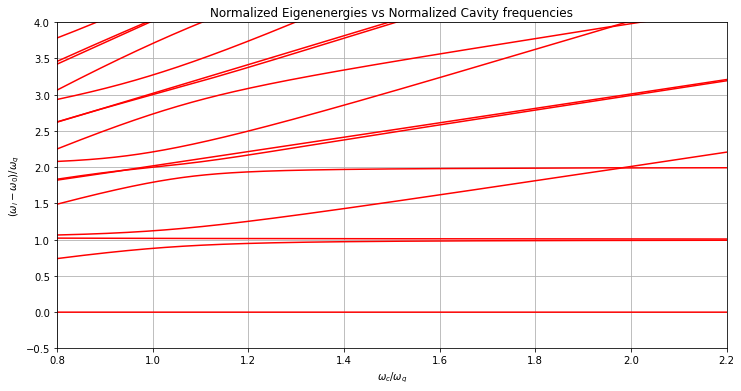

In [53]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(20):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_c_q, (evals_mat[:,n]-evals_mat[:,0]), 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

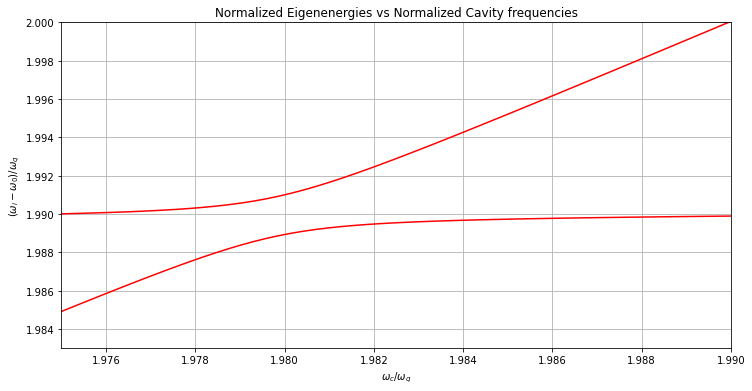

In [54]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(20):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_c_q, (evals_mat[:,n]-evals_mat[:,0]), 'r')
    
ax.set_xlim(1.975,1.99)
ax.set_ylim(1.983,2.0)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()